# *Introduction*

Dataset "Credit Card Dataset for Clustering" dapat digunakan untuk mengembangkan model segmentasi pelanggan untuk membantu dalam menentukan strategi pemasaran. Dataset tersebut bersumber dari Kaggle dan berisi 9000 baris data serta 18 kolom data dari pengguna kartu kredit selama 6 bulan. 

# *Import Libraries*

*Import* *library*-*library* yang dibutuhkan untuk komputasi, struktur data, visualisasi, dan *modelling* data.

In [87]:
%pip install numpy pandas matplotlib seaborn scikit-learn pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Note: you may need to restart the kernel to use updated packages.


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

# *Data Loading*

*Load* dataset ke dalam Pandas *dataframe*.

In [89]:
df = pd.read_csv('./datasets/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# *Data Exploration* - 1

Cek jumlah baris dan kolom padaset.

In [90]:
df.shape

(8950, 18)

Diketahui terdapat 299 baris dan 13 kolom pada dataset.

Cek *measures of central tendency* dari dataset, seperti mean, median, dan modus.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Cek nilai kosong/*missing values* pada dataset.

In [92]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Diketahui terdapat 1 *missing value* pada kolom **CREDIT_LIMIT** dan 313 *missing values* pada kolom **MINIMUM_PAYMENTS**.

# *Data Cleaning*

Hapus kolom **CUST_ID** karena nilai datanya berupa nomor ID sehingga tidak relevan.

In [93]:
df.drop(['CUST_ID'], axis=1, inplace=True)

Hapus *missing value* pada kolom **CREDIT_LIMIT**.

In [94]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

Sedangkan untuk kolom **MINIMUM_PAYMENTS**, isi *missing values* dengan nilai median data dari kolom tersebut. 

In [95]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

# *Data Exploration* - 2

Cek *measures of central tendency* dari dataset, seperti mean, median, dan modus.

In [96]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,845.003358,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.905284,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.452292,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Cek *distribution* dan *variability* dari kolom-kolom dataset dengan histogram.

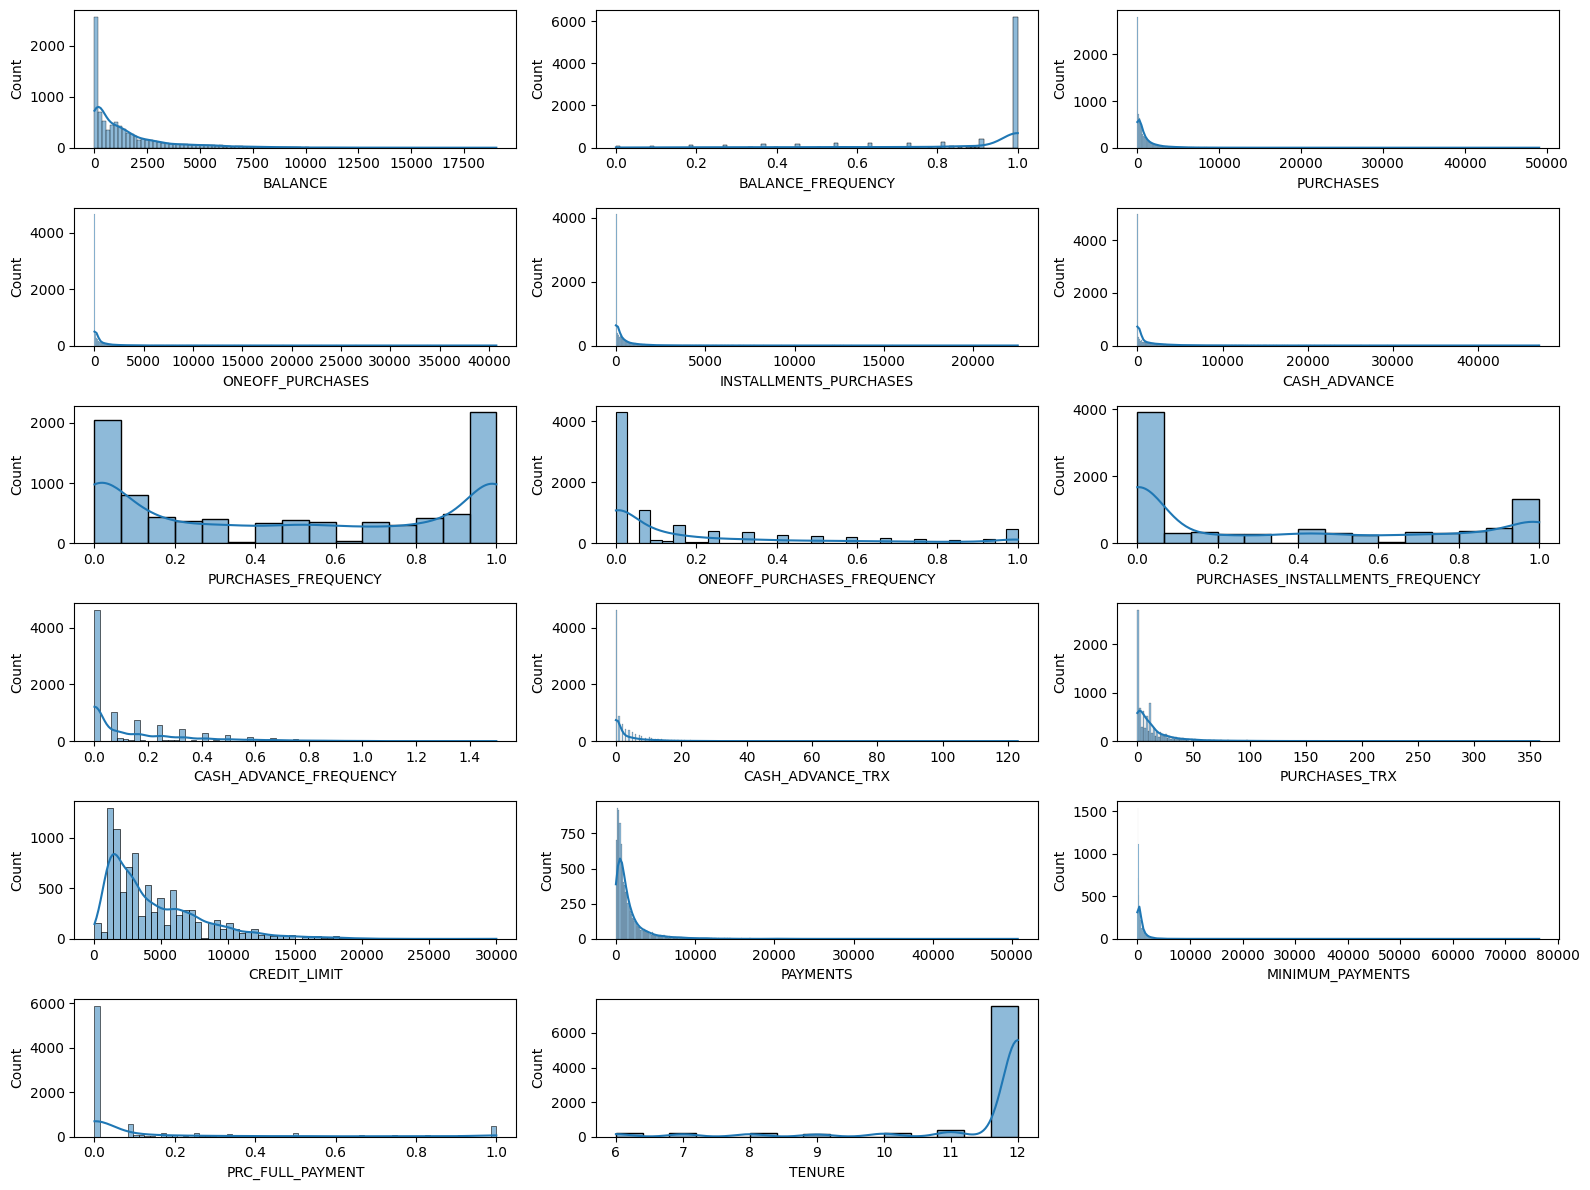

In [97]:
plt.figure(figsize=(16,12))
for i, col in enumerate(df.columns, 1):
  plt.subplot(6, 3, i)
  sns.histplot(df[col], kde=True)
  plt.tight_layout()
plt.show()

Diketahui semua kolom kecuali kolom **PURCHASE_FREQUENCY** memiliki *distribution* miring/*skew*.

Cek korelasi data antara kolom *feature* dan kolom *target* (**DEATH EVENT**) dengan *heatmap*.

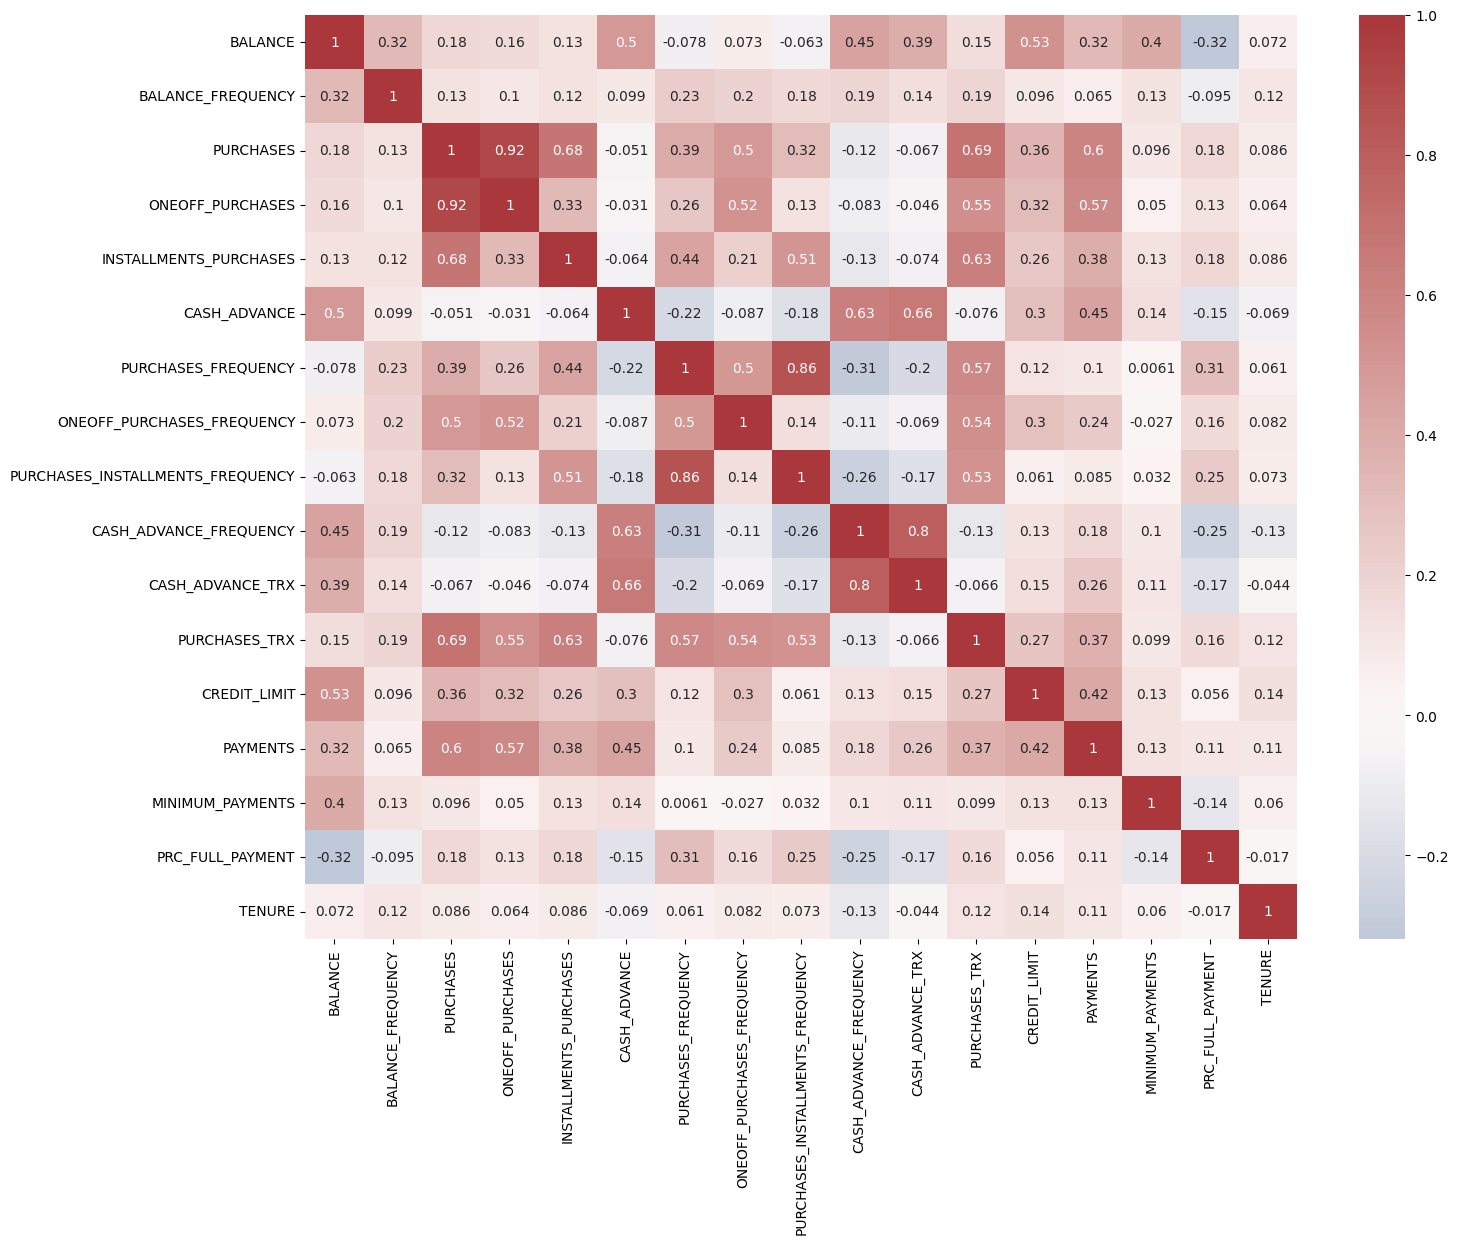

In [98]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap='vlag', center=0)
plt.show()

# *Data Processing*

Lakukan *standardization* untuk dataset.

In [99]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, columns=df.columns)

X_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03
mean,0.000000,-3.144205e-16,-8.257509e-17,-4.128754e-17,1.746781e-17,-1.587982e-17,7.701715e-17,-6.351930e-18,4.605149e-17,-1.270386e-17,1.587982e-17,1.905579e-17,2.159656e-16,6.351930e-17,1.270386e-17,-3.175965e-18,-2.794849e-16
std,1.000056,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-0.751704,-3.705263e+00,-4.695839e-01,-3.569565e-01,-4.546069e-01,-4.668054e-01,-1.221928e+00,-6.787162e-01,-9.170895e-01,-6.752945e-01,-4.760829e-01,-5.918405e-01,-1.221468e+00,-5.987332e-01,-3.622228e-01,-5.255884e-01,-4.126919e+00
25%,-0.690033,4.873144e-02,-4.509562e-01,-3.569565e-01,-4.546069e-01,-4.668054e-01,-1.014290e+00,-6.787162e-01,-9.170895e-01,-6.752945e-01,-4.760829e-01,-5.516107e-01,-7.954817e-01,-4.663388e-01,-2.889810e-01,-5.255884e-01,3.605413e-01
50%,-0.331962,5.179802e-01,-3.003952e-01,-3.340632e-01,-3.561912e-01,-4.668054e-01,2.390672e-02,-3.993831e-01,-4.977267e-01,-6.752945e-01,-4.760829e-01,-3.102316e-01,-4.107196e-01,-3.026846e-01,-2.282908e-01,-5.255884e-01,3.605413e-01
75%,0.235279,5.179802e-01,5.001060e-02,-8.840161e-03,6.362342e-02,6.432979e-02,1.062103e+00,3.268871e-01,9.700395e-01,4.351431e-01,1.100315e-01,9.206698e-02,5.511855e-01,5.801121e-02,-2.412652e-02,-3.717957e-02,3.605413e-01
max,8.397195,5.179802e-01,2.248248e+01,2.419985e+01,2.442576e+01,2.201002e+01,1.269742e+00,2.673295e+00,1.599083e+00,6.820167e+00,1.754694e+01,1.381045e+01,7.009692e+00,1.692160e+01,3.239112e+01,2.893277e+00,3.605413e-01


Cek dataset yang telah ter-*standardized* dengan *box plot*.

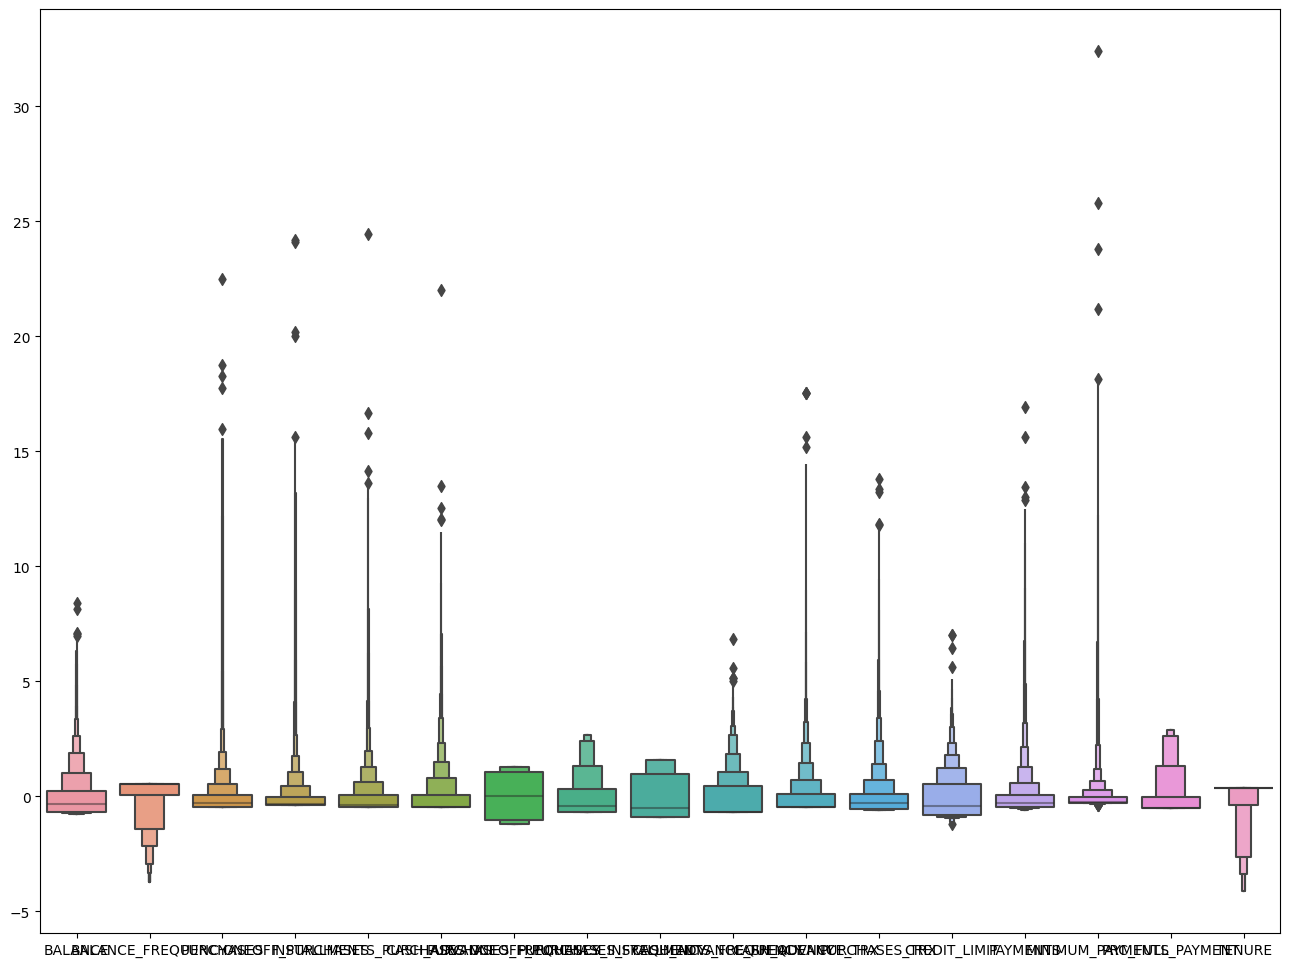

In [100]:
plt.figure(figsize=(16,12))
sns.boxenplot(X_scaled)
plt.show()

# *Modelling*

## KMeans

Lakukan *training* untuk model KMeans dengan data dari model PCA sebelumnya. Lakukan *training* dengan jumlah *cluster* 1 sampai 10, lalu tampilkan plot *inertia* dari setiap hasil model KMeans yang di-*train* untuk dilakukan pengecekan *Elbow Method*.

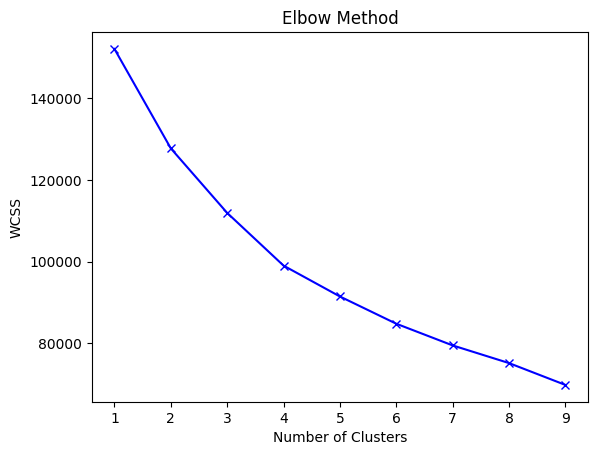

In [101]:
kmeans_models = [KMeans(n_clusters=k).fit(X_scaled) for k in range(1, 10)]
inertias = [kmeans.inertia_ for kmeans in kmeans_models]

plt.plot(range(1, 10), inertias, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Dari pengecekan *Elbow Method*, diketahui siku/*elbow* dari plot *inertia* diatas tidak terlalu dapat dipastikan tetapi untuk yang paling mendekati seperti siku adalah di cluster ke-2. Dengan demikian, ada kemungkinan jumlah *cluster* terbaik yang dapat diterapkan untuk dataset adalah 2.

Agar lebih dapat memastikan jumlah *cluster* terbaik untuk dataset, lakukan pengecekan kembali dengan menampilkan plot *Silhouette Scores* dari setiap *cluster*.

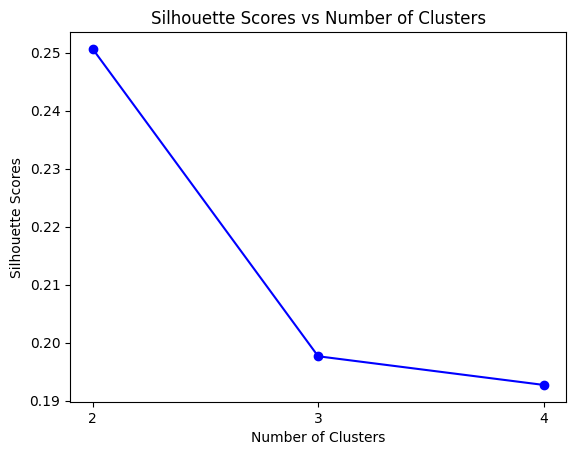

In [102]:
elbow_start = 2
elbow_end = 5
ss = [silhouette_score(X_scaled, kmeans.labels_) for kmeans in kmeans_models[elbow_start:elbow_end]]

plt.plot(range(elbow_start, elbow_end), ss, 'bo-')
plt.xticks(range(elbow_start, elbow_end))
plt.title('Silhouette Scores vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.show()

Diketahui *cluster* ke-2 memiliki *Silhoutte Score* paling tinggi. Dengan demikian, jumlah *cluster* terbaik yang dapat diterapkan untuk dataset adalah 2.

Lakukan kembali *training* untuk model KMeans dengan jumlah *cluster* 2.

In [103]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)

print('Silhoutte score of the model is ' + str(silhouette_score(X_scaled, kmeans.labels_)))

Silhoutte score of the model is 0.20969973811404027


Dapatkan *cluster*-*cluster* yang terdefinisikan.

In [104]:
clusters = kmeans.labels_
clusters

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

Untuk membantu menginterpretasikan setiap *cluster*, buat *fuction* untuk mengecek *rule* dari setiap *cluster*.

In [105]:
from IPython.display import display, HTML
from sklearn.tree import _tree, DecisionTreeClassifier

def pretty_print(df):
  return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])

Cek *rule* dari setiap *cluster*.

In [106]:
cluster_report(df, clusters, min_samples_leaf=10, pruning_level=0.05)

,class_name,instance_count,rule_list
1,0,3720,[0.925709737330857] (PURCHASES_FREQUENCY > 0.6306819915771484)
0,1,5229,[0.9554054054054054] (PURCHASES_FREQUENCY <= 0.6306819915771484)


Diketahui *cluster*-*cluster* sebelumnya dapat diinterpretasikan sebagai berikut:
- **Cluster 0**: Pengguna kartu kredit dengan pembelian tinggi.
- **Cluster 1**: Pengguna kartu kredit dengan pembelian rendah.

## *Principal Component Analysis* (PCA)

Lakukan *training* untuk model PCA dengan dataset sebelumnya. Lakukan dengan jumlah PC 2 untuk mengubah dataset menjadi 2D dan dapat divisualisasikan.

In [107]:
pca = PCA(2)
pc = pca.fit_transform(df)

pc_df = pd.DataFrame(pc, columns=[f'PC{i}' for i in range(1, len(pc[0])+1)])
pc_df['CLUSTER'] = clusters

pc_df.head()

,PC1,PC2,CLUSTER
0,-4324.351008,915.734333,1
1,4120.975546,-2437.938847,1
2,1498.994555,-2001.750670,0
3,1321.563972,-1387.728898,1
4,-3741.083696,751.701480,1


Cek distribusi *cluster* data berdasarkan 2 kolom PC yang telah terdefinisikan dengan plot *scatter*.

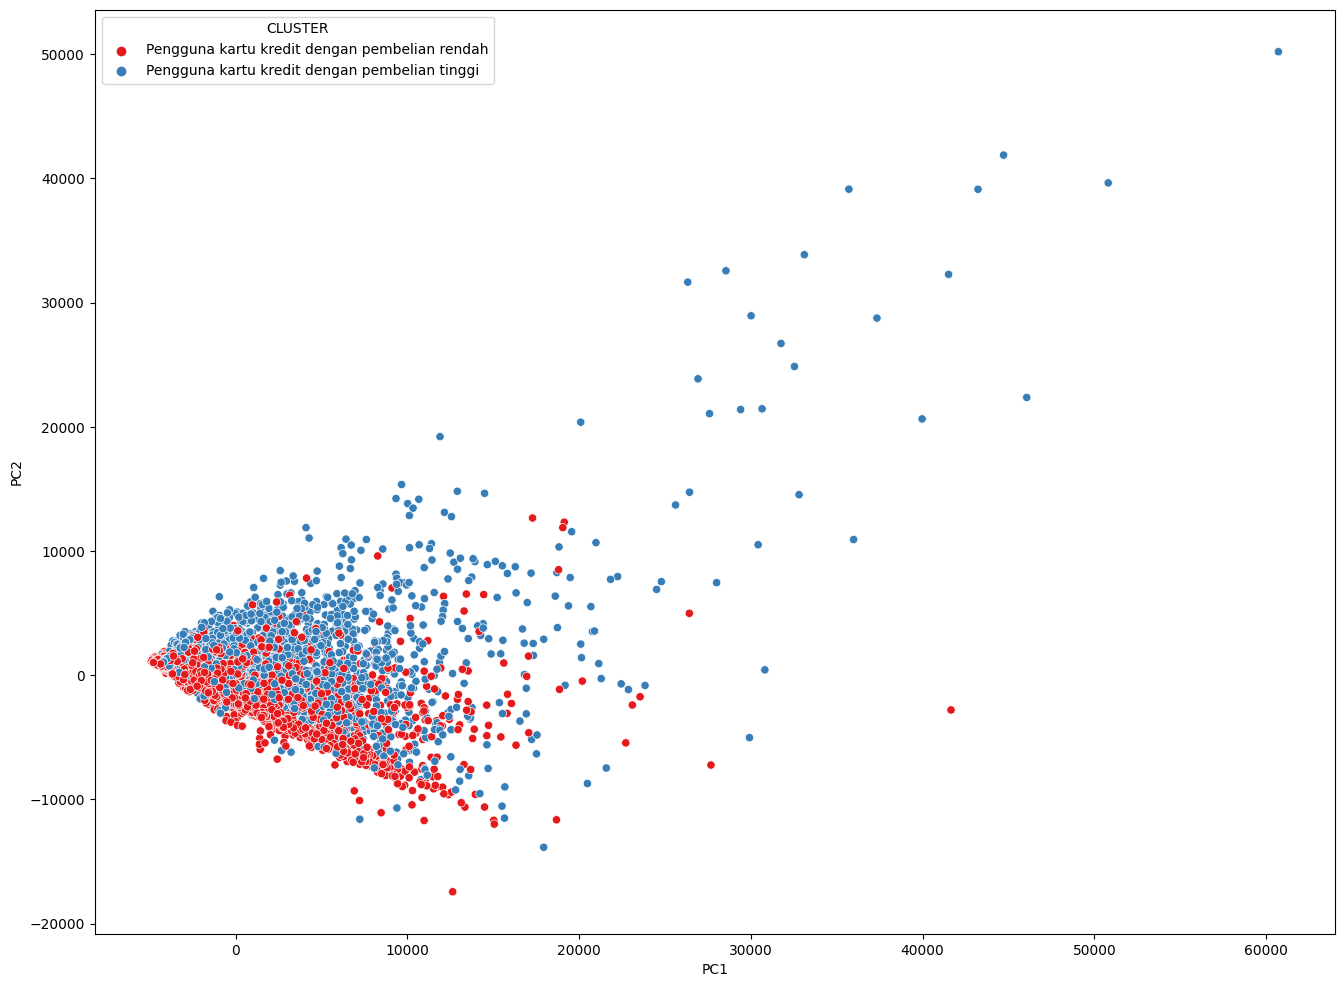

In [111]:
legend_map = {0: 'Pengguna kartu kredit dengan pembelian tinggi', 
              1: 'Pengguna kartu kredit dengan pembelian rendah',}

plt.figure(figsize=(16, 12))
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue=pc_df['CLUSTER'].map(legend_map), palette='Set1')
plt.show()

# *Export Model*

*Export* model yang dipilih sebelumnya dengan menyimpannya menjadi file Pickle.

In [112]:
with open('cc_users_clusterer.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [113]:
!mkdir ./app/models
!mv cc_users_clusterer.pkl ./app/models/cc_users_clusterer.pkl 

mkdir: ./exported-files/models: File exists
